# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import environmentv1 as e
import seaborn as sns
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

1/3 -- 0.33475494384765625
0.35 -- 0.36702728271484375
0.4 -- 0.47370147705078125
0.45 -- 0.6032638549804688

In [2]:
env = e.Environment(0.45, 9)
from dqn_agent import Agent
agent = Agent(state_size=2, action_size=3, seed=0)

In [3]:
rho = 0.6032638549804688
def evalReward(reward):
    reward = (1 - rho) * reward[0] - rho * reward[1]
    if reward > 10:
        return 10
    if reward < -10:
        return -10
    return reward

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Alternatively, you can skip to the next step below (**4. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

Episode 20	Average Score: -252.33
0.9046104802746175


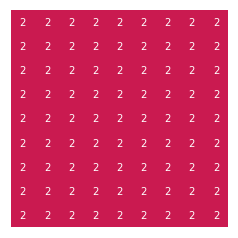

Episode 40	Average Score: -225.48
0.8183201210226743


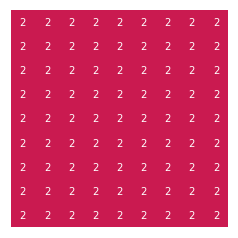

Episode 60	Average Score: -214.47
0.7402609576967045


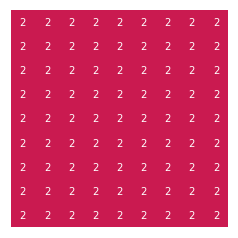

Episode 80	Average Score: -205.94
0.6696478204705644


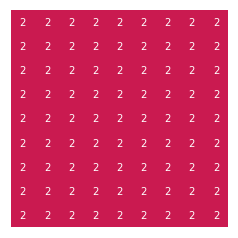

Episode 100	Average Score: -199.31
0.6057704364907278


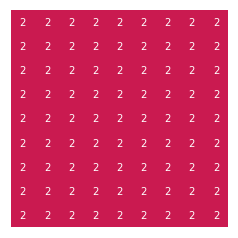

Episode 120	Average Score: -176.95
0.547986285490042


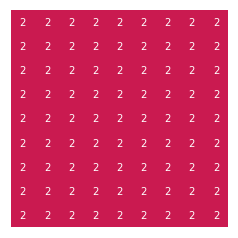

Episode 140	Average Score: -168.66
0.49571413690105054


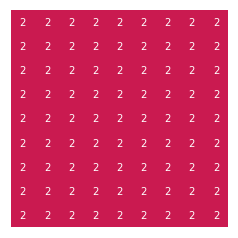

Episode 160	Average Score: -153.27
0.4484282034609769


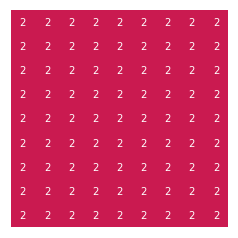

Episode 180	Average Score: -142.87
0.40565285250151817


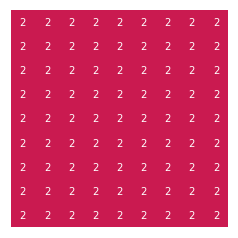

Episode 200	Average Score: -130.35
0.3669578217261671


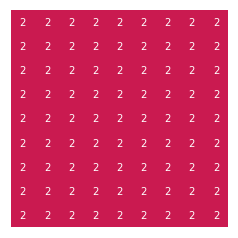

Episode 220	Average Score: -123.51
0.33195389135223546


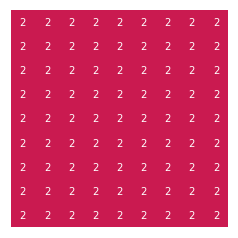

Episode 240	Average Score: -111.13
0.30028896908517405


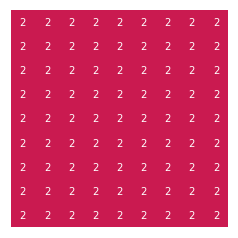

Episode 260	Average Score: -106.93
0.27164454854530906


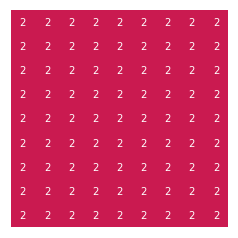

Episode 280	Average Score: -97.354
0.2457325055235537


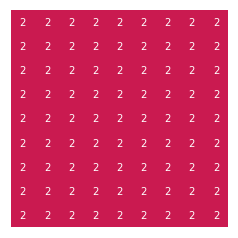

Episode 300	Average Score: -90.69
0.22229219984074702


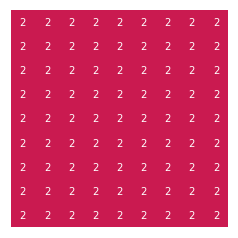

Episode 320	Average Score: -83.74
0.2010878536592394


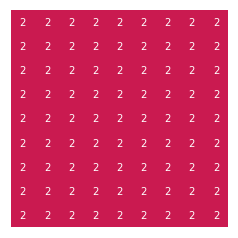

Episode 340	Average Score: -78.29
0.18190617987607657


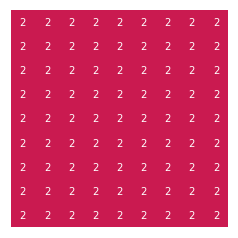

Episode 360	Average Score: -72.58
0.16455423674261854


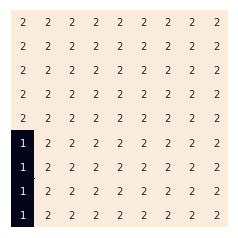

Episode 380	Average Score: -68.11
0.14885748713096328


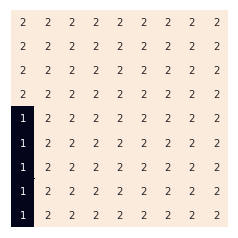

Episode 400	Average Score: -64.74
0.1346580429260134


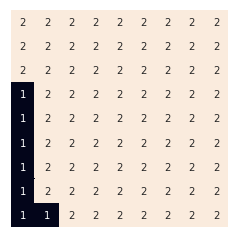

Episode 420	Average Score: -60.66
0.12181307688414106


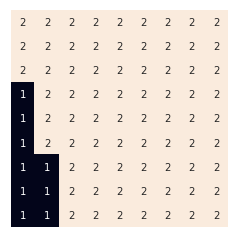

Episode 440	Average Score: -56.84
0.11019338598389174


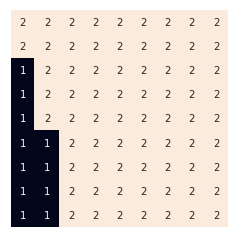

Episode 460	Average Score: -52.50
0.0996820918179746


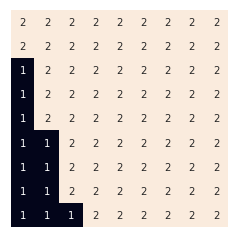

Episode 480	Average Score: -50.50
0.09017346495423652


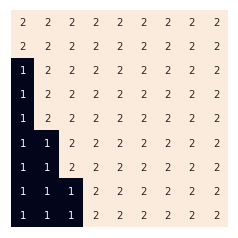

Episode 500	Average Score: -48.35
0.08157186144027828


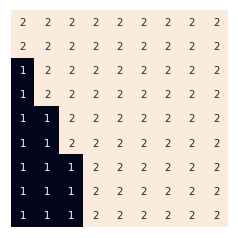

Episode 520	Average Score: -47.14
0.07379076075438468


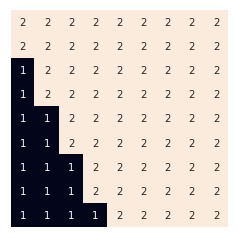

Episode 540	Average Score: -45.83
0.0667518955258533


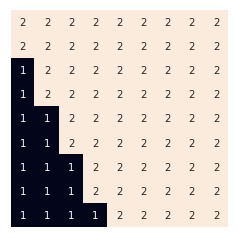

Episode 560	Average Score: -44.75
0.06038446427088321


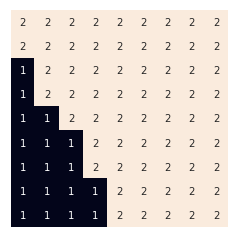

Episode 580	Average Score: -42.54
0.05462441922520914


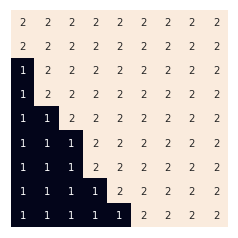

Episode 600	Average Score: -39.57
0.0494138221100385


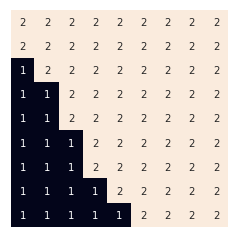

Episode 620	Average Score: -37.55
0.04470026135116646


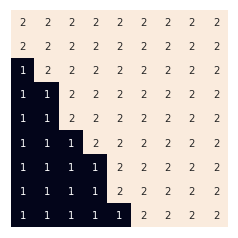

Episode 640	Average Score: -34.97
0.04043632488927963


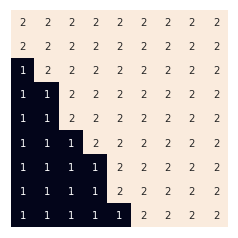

Episode 660	Average Score: -34.56
0.03657912327863173


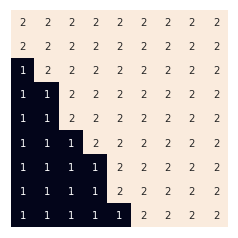

Episode 680	Average Score: -32.80
0.03308985827710748


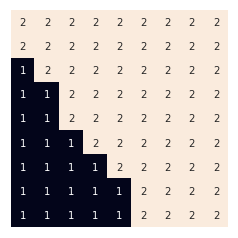

Episode 700	Average Score: -33.35
0.029933432588273214


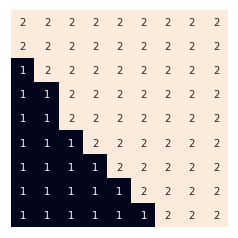

Episode 720	Average Score: -32.42
0.02707809682994571


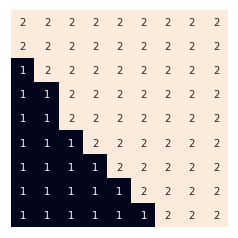

Episode 740	Average Score: -32.24
0.02449513017825978


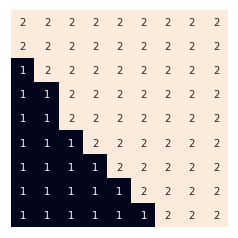

Episode 760	Average Score: -30.52
0.022158551474944856


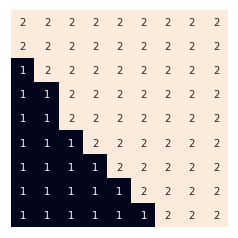

Episode 780	Average Score: -30.50
0.020044857891939702


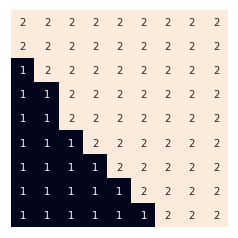

Episode 800	Average Score: -28.14
0.018132788524664028


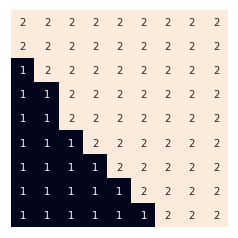

Episode 820	Average Score: -27.52
0.0164031105360144


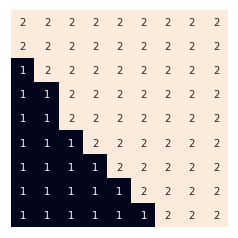

Episode 840	Average Score: -27.09
0.014838425699981627


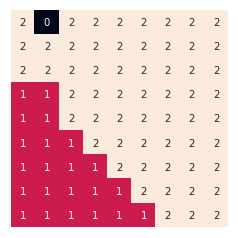

Episode 860	Average Score: -26.24
0.013422995398979608


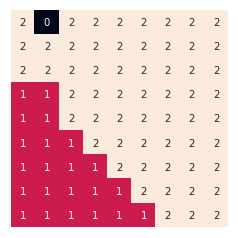

Episode 880	Average Score: -25.26
0.012142582314594924


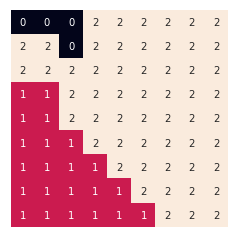

Episode 900	Average Score: -24.53
0.01098430721937979


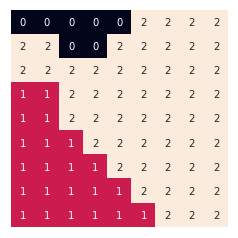

Episode 920	Average Score: -23.42
0.01


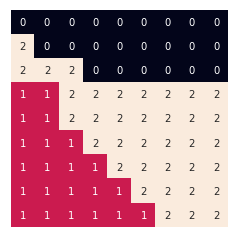

Episode 940	Average Score: -22.83
0.01


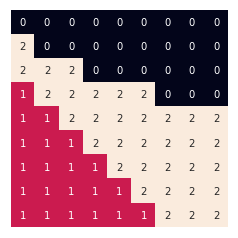

Episode 960	Average Score: -23.08
0.01


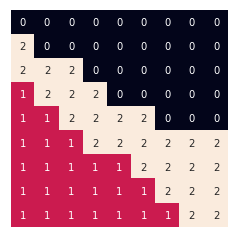

Episode 980	Average Score: -22.82
0.01


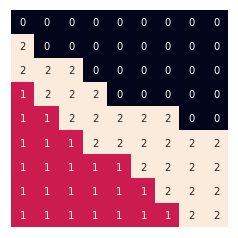

Episode 1000	Average Score: -23.04
0.01


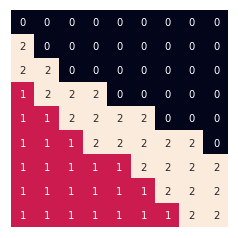

Episode 1020	Average Score: -23.74
0.01


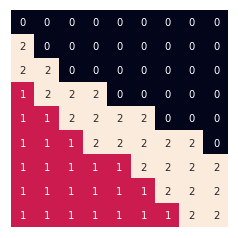

Episode 1040	Average Score: -24.20
0.01


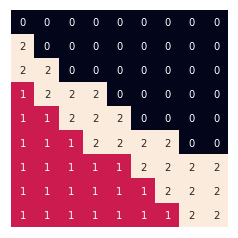

Episode 1060	Average Score: -23.95
0.01


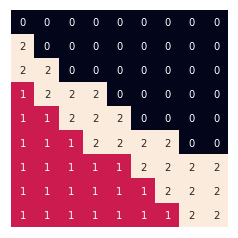

Episode 1080	Average Score: -24.15
0.01


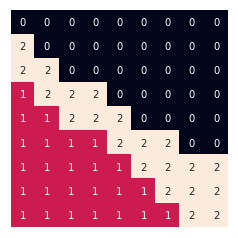

Episode 1100	Average Score: -25.11
0.01


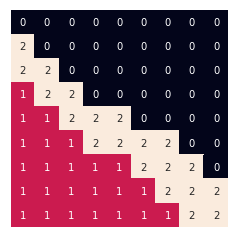

Episode 1120	Average Score: -25.19
0.01


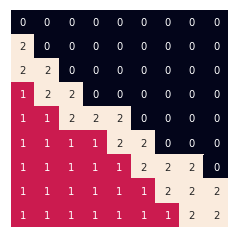

Episode 1140	Average Score: -24.88
0.01


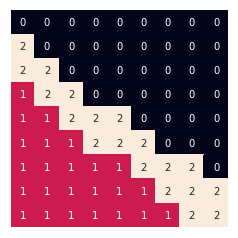

Episode 1160	Average Score: -25.32
0.01


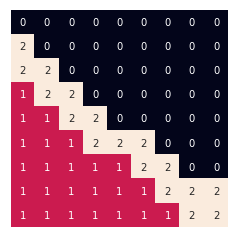

Episode 1180	Average Score: -25.61
0.01


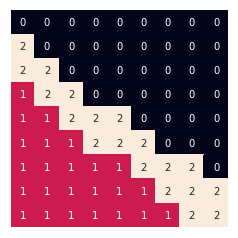

Episode 1200	Average Score: -24.81
0.01


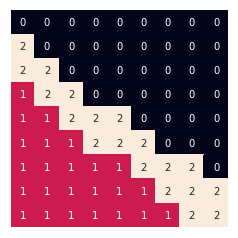

Episode 1220	Average Score: -24.78
0.01


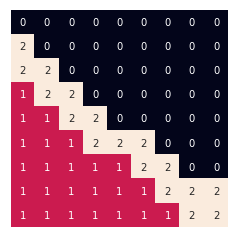

Episode 1240	Average Score: -24.40
0.01


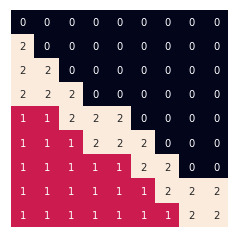

Episode 1260	Average Score: -24.58
0.01


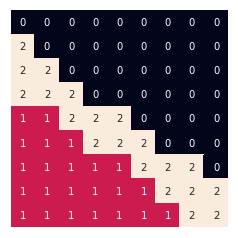

Episode 1280	Average Score: -23.73
0.01


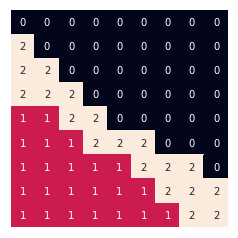

Episode 1300	Average Score: -23.96
0.01


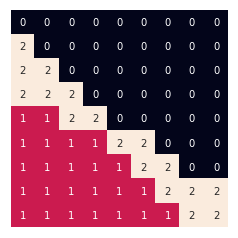

Episode 1320	Average Score: -23.57
0.01


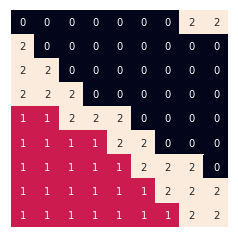

Episode 1340	Average Score: -23.82
0.01


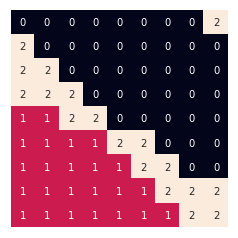

Episode 1360	Average Score: -23.24
0.01


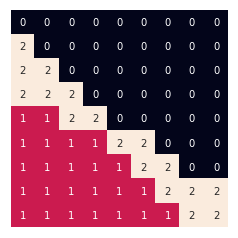

Episode 1380	Average Score: -23.77
0.01


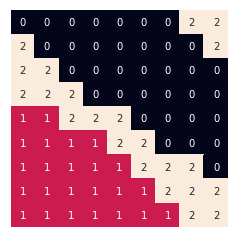

Episode 1400	Average Score: -23.83
0.01


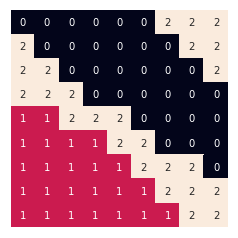

Episode 1420	Average Score: -23.49
0.01


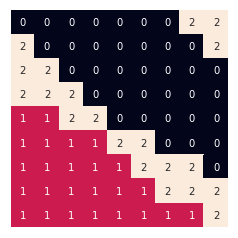

Episode 1440	Average Score: -23.68
0.01


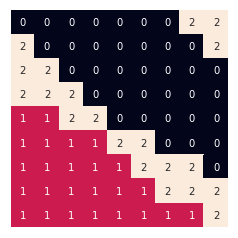

Episode 1460	Average Score: -24.34
0.01


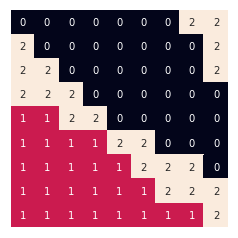

Episode 1480	Average Score: -24.40
0.01


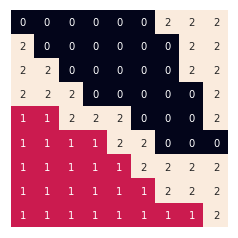

Episode 1500	Average Score: -25.55
0.01


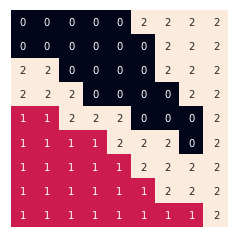

Episode 1520	Average Score: -27.91
0.01


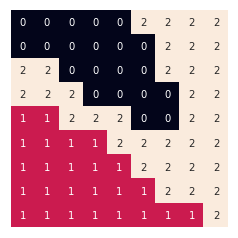

Episode 1540	Average Score: -29.99
0.01


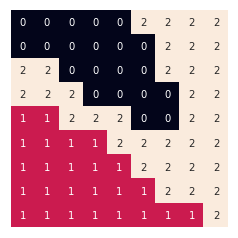

Episode 1560	Average Score: -31.37
0.01


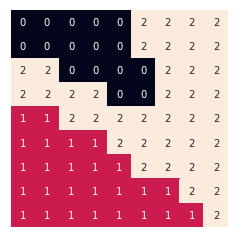

Episode 1580	Average Score: -33.40
0.01


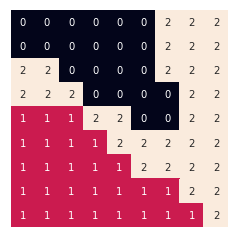

Episode 1600	Average Score: -34.38
0.01


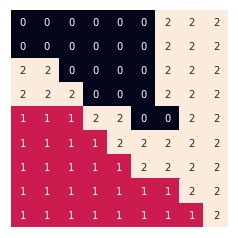

Episode 1620	Average Score: -34.52
0.01


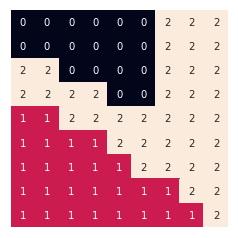

Episode 1640	Average Score: -33.73
0.01


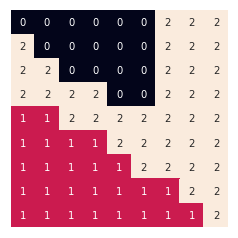

Episode 1660	Average Score: -31.57
0.01


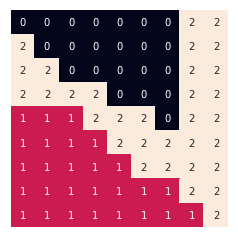

Episode 1680	Average Score: -29.98
0.01


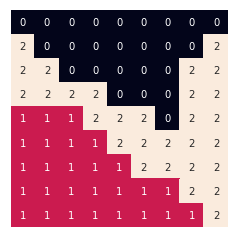

Episode 1700	Average Score: -27.74
0.01


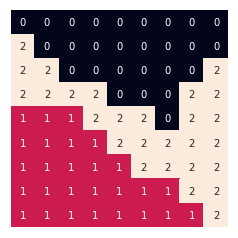

Episode 1720	Average Score: -25.35
0.01


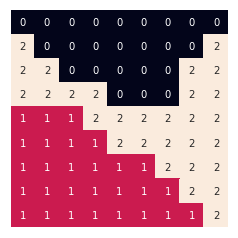

Episode 1740	Average Score: -23.11
0.01


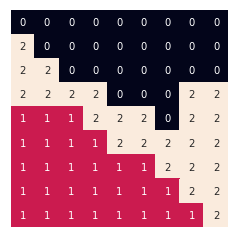

Episode 1760	Average Score: -22.89
0.01


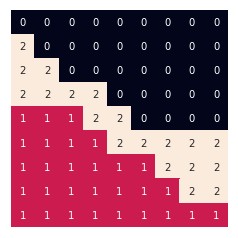

Episode 1780	Average Score: -22.29
0.01


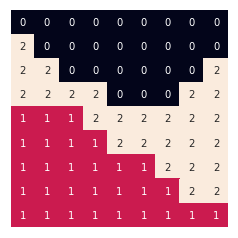

Episode 1800	Average Score: -22.25
0.01


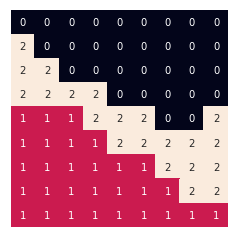

Episode 1820	Average Score: -22.55
0.01


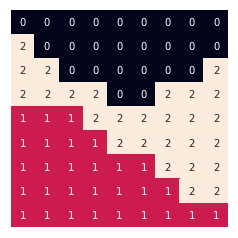

Episode 1840	Average Score: -22.84
0.01


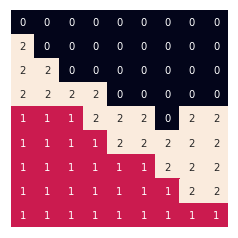

Episode 1860	Average Score: -23.14
0.01


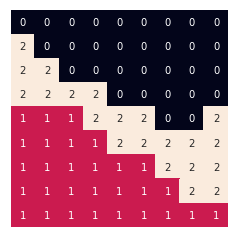

Episode 1880	Average Score: -23.21
0.01


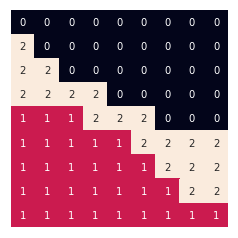

Episode 1900	Average Score: -22.35
0.01


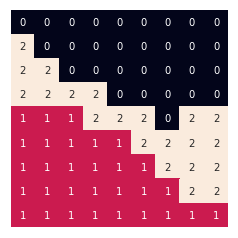

Episode 1920	Average Score: -22.20
0.01


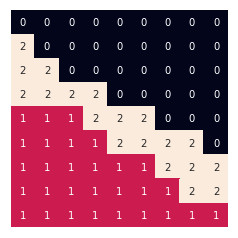

Episode 1940	Average Score: -22.70
0.01


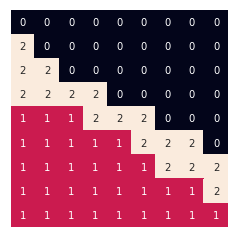

Episode 1960	Average Score: -22.24
0.01


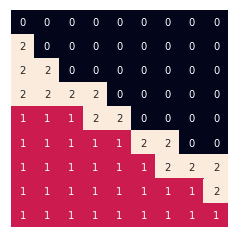

Episode 1980	Average Score: -21.96
0.01


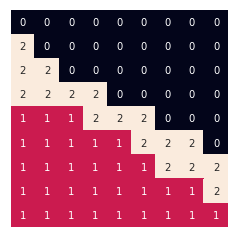

Episode 2000	Average Score: -22.65
0.01


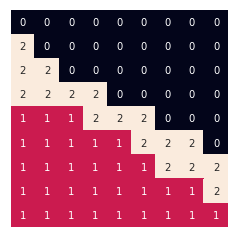

Episode 2020	Average Score: -22.48
0.01


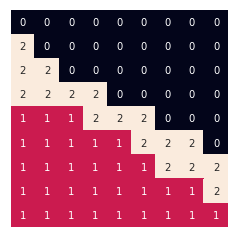

Episode 2040	Average Score: -21.44
0.01


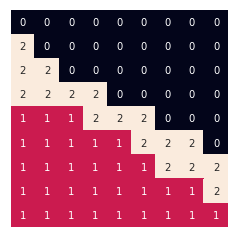

Episode 2060	Average Score: -21.80
0.01


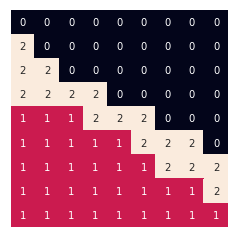

Episode 2080	Average Score: -21.75
0.01


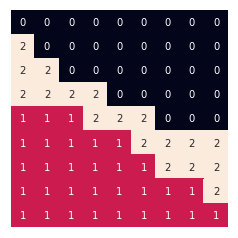

Episode 2100	Average Score: -21.38
0.01


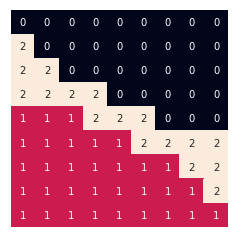

Episode 2120	Average Score: -21.85
0.01


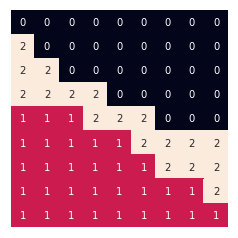

Episode 2140	Average Score: -22.17
0.01


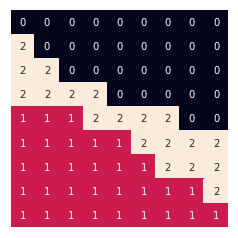

Episode 2160	Average Score: -21.46
0.01


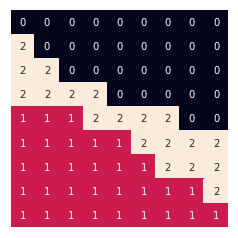

Episode 2180	Average Score: -20.95
0.01


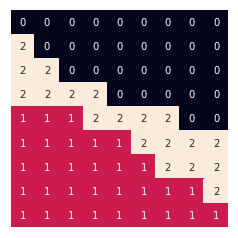

Episode 2200	Average Score: -20.67
0.01


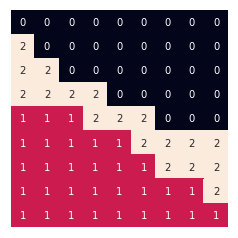

Episode 2220	Average Score: -20.31
0.01


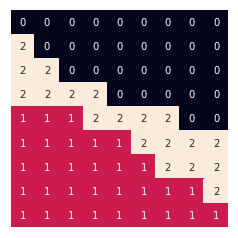

Episode 2240	Average Score: -20.62
0.01


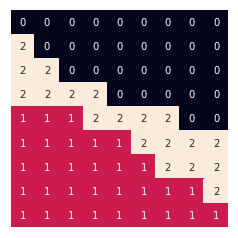

Episode 2260	Average Score: -20.87
0.01


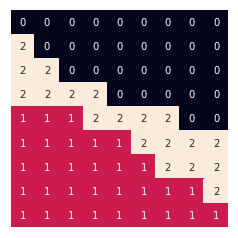

Episode 2280	Average Score: -20.57
0.01


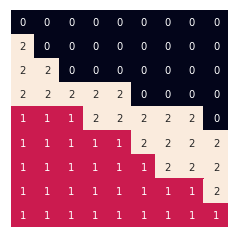

Episode 2300	Average Score: -20.45
0.01


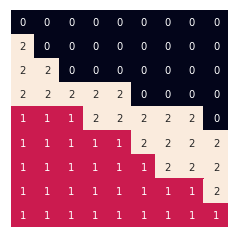

Episode 2320	Average Score: -19.91
0.01


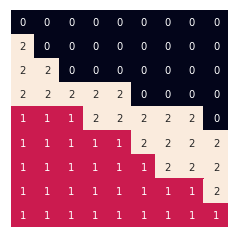

Episode 2340	Average Score: -20.44
0.01


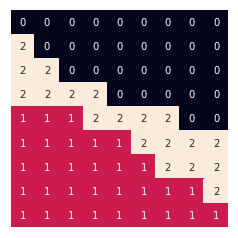

Episode 2360	Average Score: -20.59
0.01


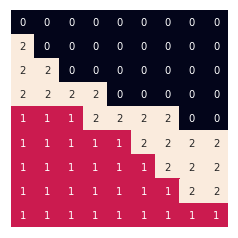

Episode 2380	Average Score: -21.68
0.01


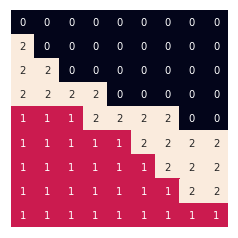

Episode 2400	Average Score: -21.56
0.01


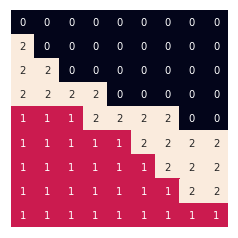

Episode 2420	Average Score: -21.65
0.01


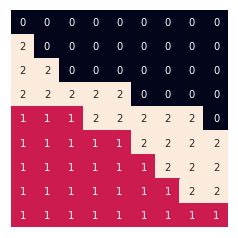

Episode 2440	Average Score: -20.50
0.01


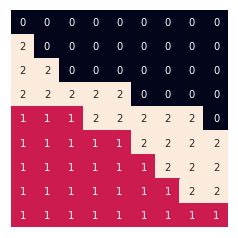

Episode 2460	Average Score: -20.51
0.01


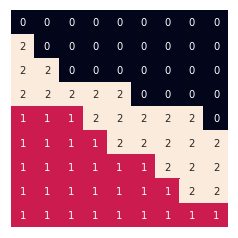

Episode 2480	Average Score: -19.52
0.01


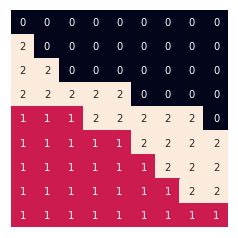

Episode 2500	Average Score: -19.72
0.01


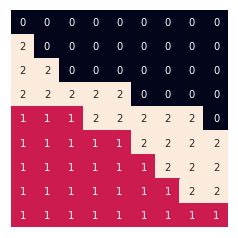

Episode 2520	Average Score: -19.75
0.01


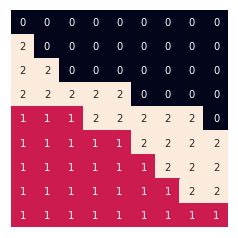

Episode 2540	Average Score: -20.47
0.01


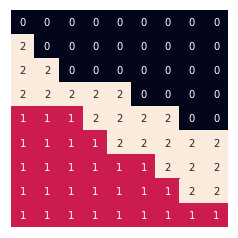

Episode 2560	Average Score: -19.58
0.01


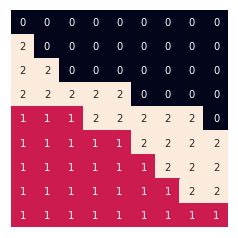

Episode 2580	Average Score: -20.16
0.01


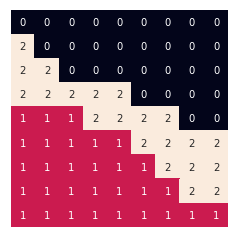

Episode 2600	Average Score: -20.32
0.01


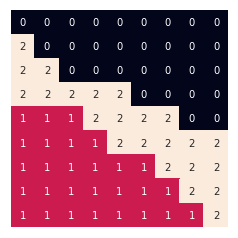

Episode 2620	Average Score: -20.32
0.01


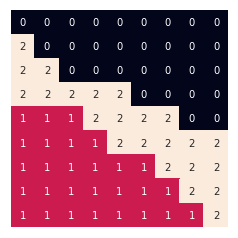

Episode 2640	Average Score: -20.31
0.01


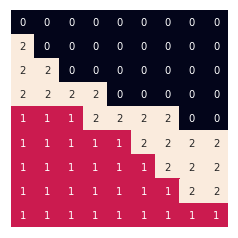

Episode 2660	Average Score: -20.90
0.01


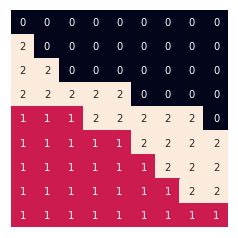

Episode 2680	Average Score: -20.56
0.01


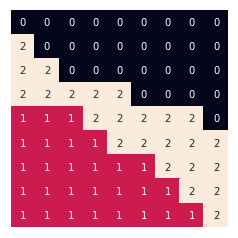

Episode 2700	Average Score: -20.07
0.01


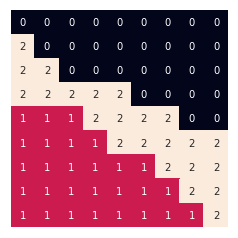

Episode 2720	Average Score: -20.47
0.01


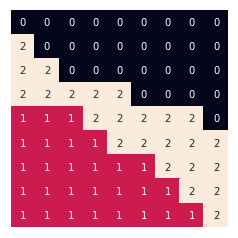

Episode 2740	Average Score: -20.88
0.01


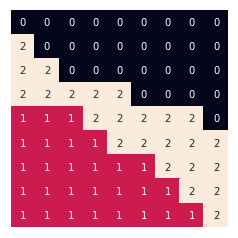

Episode 2760	Average Score: -21.09
0.01


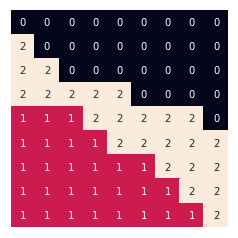

Episode 2780	Average Score: -20.97
0.01


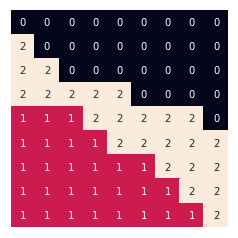

Episode 2800	Average Score: -20.75
0.01


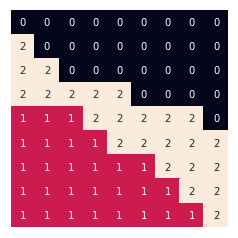

Episode 2820	Average Score: -20.30
0.01


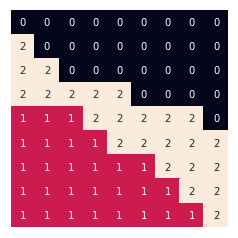

Episode 2840	Average Score: -19.37
0.01


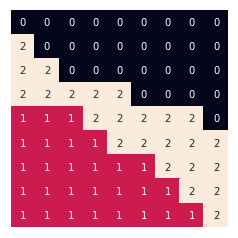

Episode 2860	Average Score: -19.14
0.01


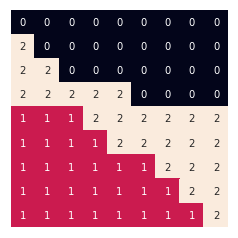

Episode 2880	Average Score: -19.60
0.01


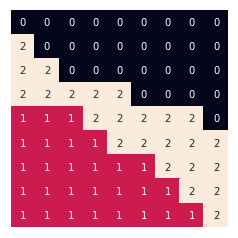

Episode 2900	Average Score: -20.35
0.01


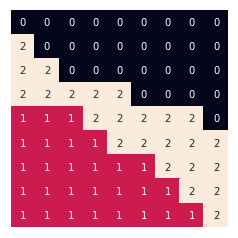

Episode 2920	Average Score: -20.34
0.01


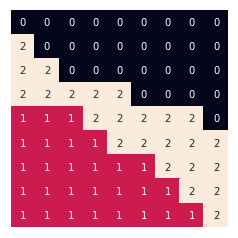

Episode 2940	Average Score: -20.64
0.01


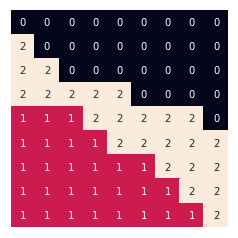

Episode 2960	Average Score: -22.00
0.01


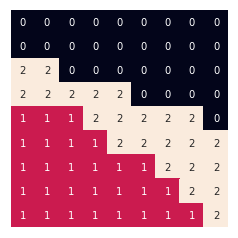

Episode 2980	Average Score: -24.60
0.01


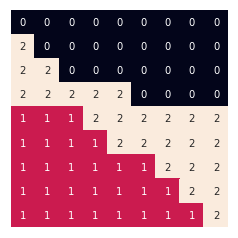

Episode 3000	Average Score: -24.39
0.01


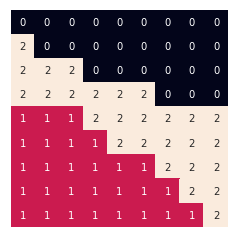

Episode 3020	Average Score: -23.40
0.01


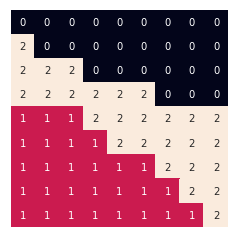

Episode 3040	Average Score: -23.43
0.01


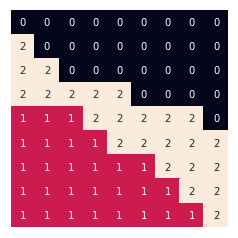

Episode 3060	Average Score: -21.51
0.01


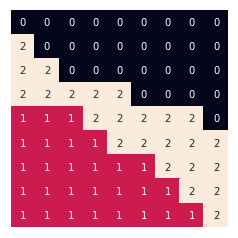

Episode 3080	Average Score: -18.64
0.01


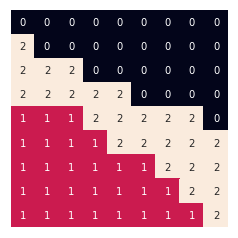

Episode 3100	Average Score: -18.46
0.01


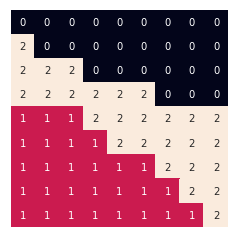

Episode 3120	Average Score: -19.20
0.01


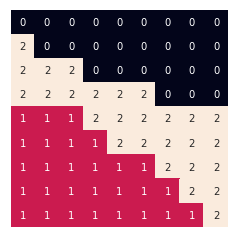

Episode 3140	Average Score: -18.30
0.01


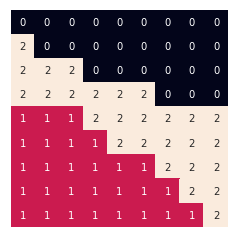

Episode 3160	Average Score: -18.97
0.01


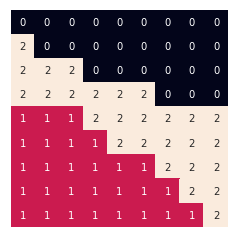

Episode 3180	Average Score: -18.60
0.01


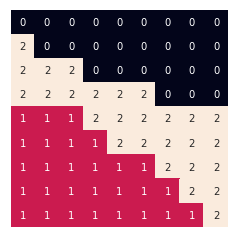

Episode 3200	Average Score: -18.98
0.01


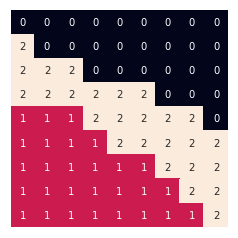

Episode 3220	Average Score: -18.59
0.01


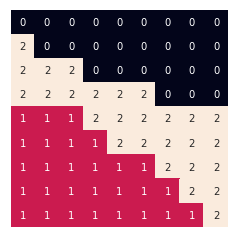

Episode 3240	Average Score: -19.10
0.01


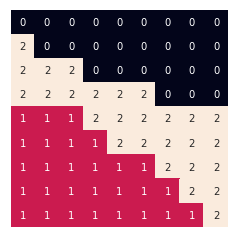

Episode 3260	Average Score: -18.63
0.01


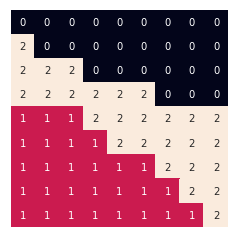

Episode 3280	Average Score: -18.53
0.01


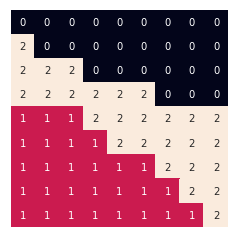

Episode 3300	Average Score: -17.97
0.01


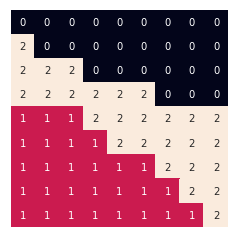

Episode 3320	Average Score: -18.42
0.01


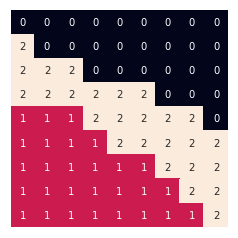

Episode 3340	Average Score: -17.99
0.01


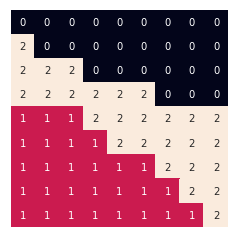

Episode 3360	Average Score: -17.95
0.01


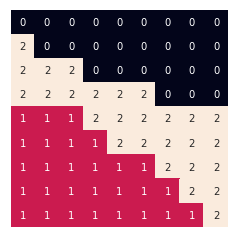

Episode 3380	Average Score: -17.85
0.01


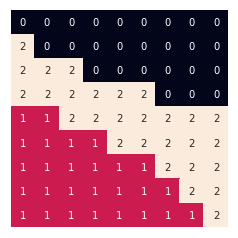

Episode 3400	Average Score: -17.89
0.01


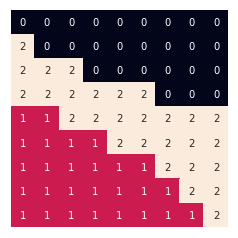

Episode 3420	Average Score: -17.96
0.01


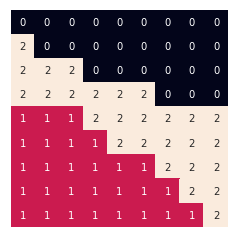

Episode 3440	Average Score: -18.68
0.01


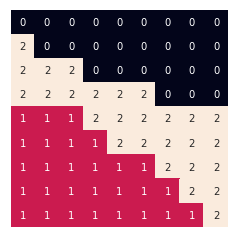

Episode 3460	Average Score: -19.14
0.01


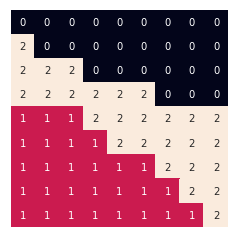

Episode 3480	Average Score: -19.98
0.01


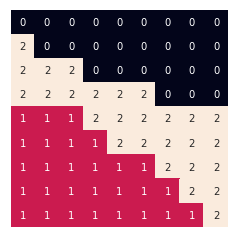

Episode 3500	Average Score: -20.07
0.01


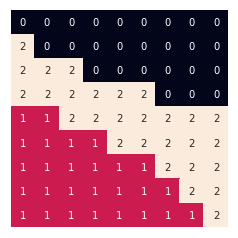

Episode 3520	Average Score: -19.61
0.01


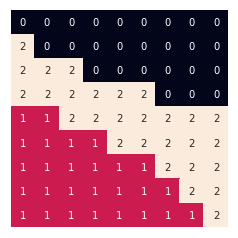

Episode 3540	Average Score: -19.27
0.01


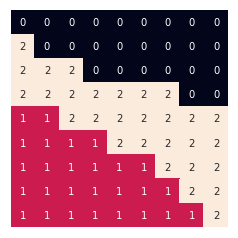

Episode 3560	Average Score: -19.40
0.01


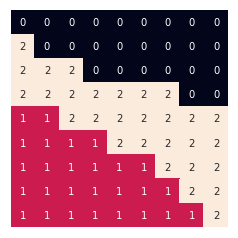

Episode 3580	Average Score: -19.45
0.01


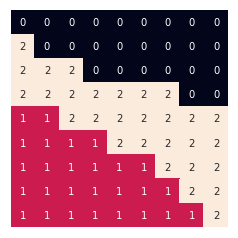

Episode 3600	Average Score: -19.14
0.01


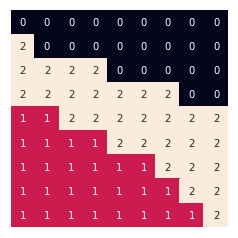

Episode 3620	Average Score: -19.09
0.01


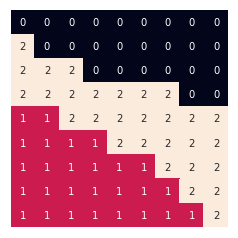

Episode 3640	Average Score: -18.98
0.01


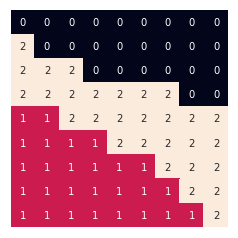

Episode 3660	Average Score: -18.20
0.01


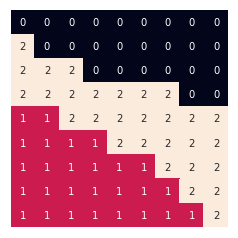

Episode 3680	Average Score: -17.80
0.01


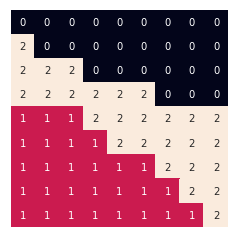

Episode 3700	Average Score: -17.80
0.01


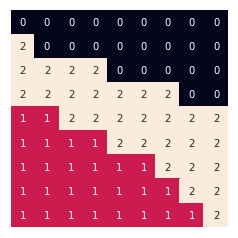

Episode 3720	Average Score: -17.33
0.01


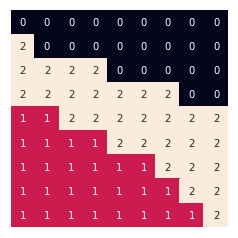

Episode 3740	Average Score: -17.73
0.01


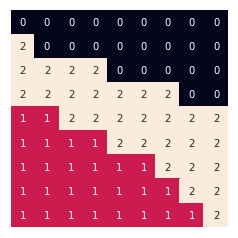

Episode 3760	Average Score: -17.86
0.01


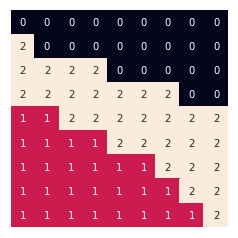

Episode 3780	Average Score: -18.25
0.01


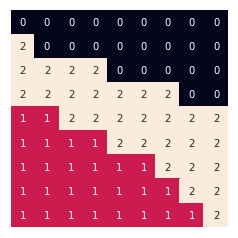

Episode 3800	Average Score: -18.51
0.01


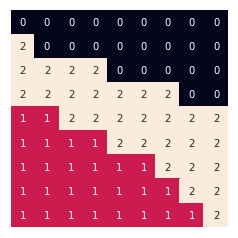

Episode 3820	Average Score: -19.30
0.01


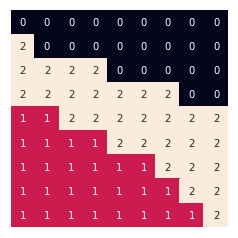

Episode 3840	Average Score: -18.83
0.01


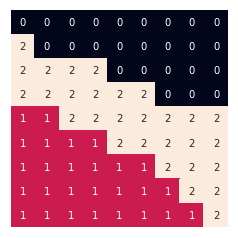

Episode 3860	Average Score: -19.18
0.01


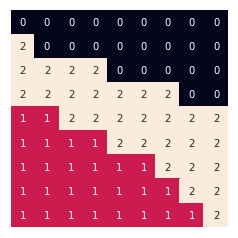

Episode 3880	Average Score: -18.31
0.01


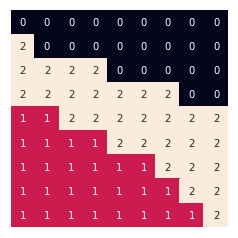

Episode 3900	Average Score: -18.14
0.01


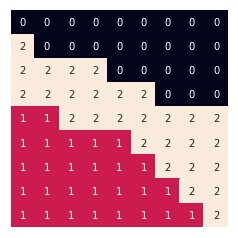

Episode 3920	Average Score: -17.72
0.01


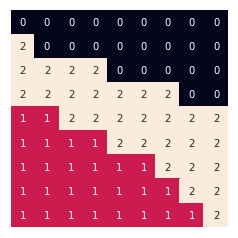

Episode 3940	Average Score: -17.86
0.01


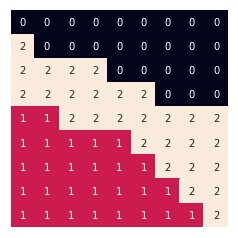

Episode 3960	Average Score: -17.77
0.01


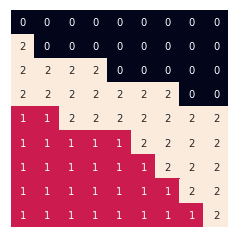

Episode 3980	Average Score: -18.21
0.01


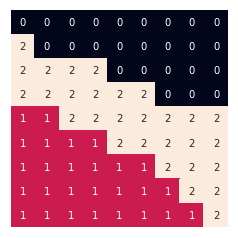

Episode 4000	Average Score: -18.05
0.01


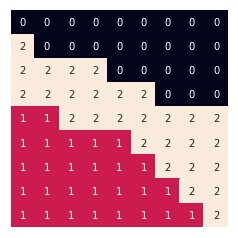

Episode 4020	Average Score: -17.99
0.01


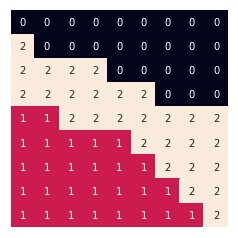

Episode 4040	Average Score: -17.85
0.01


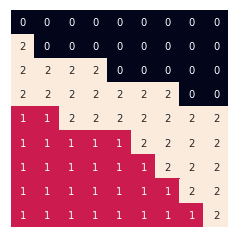

Episode 4060	Average Score: -16.54
0.01


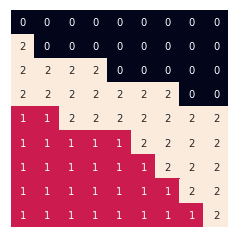

Episode 4080	Average Score: -16.41
0.01


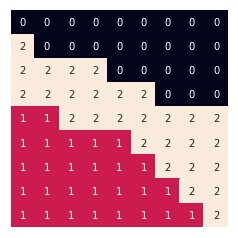

Episode 4100	Average Score: -17.12
0.01


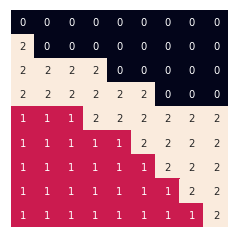

Episode 4120	Average Score: -17.47
0.01


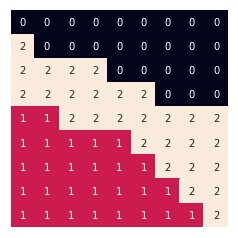

Episode 4140	Average Score: -17.21
0.01


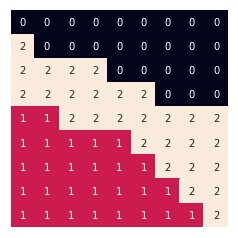

Episode 4160	Average Score: -18.39
0.01


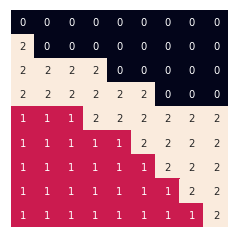

Episode 4180	Average Score: -18.29
0.01


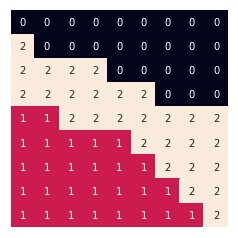

Episode 4200	Average Score: -17.12
0.01


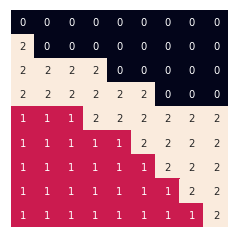

Episode 4220	Average Score: -16.82
0.01


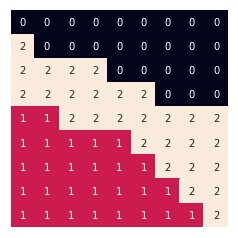

Episode 4240	Average Score: -17.67
0.01


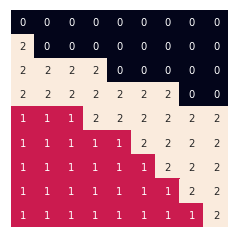

Episode 4260	Average Score: -18.21
0.01


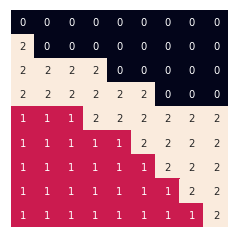

Episode 4280	Average Score: -18.68
0.01


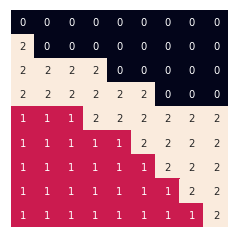

Episode 4300	Average Score: -18.70
0.01


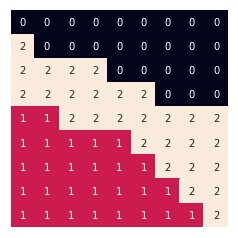

Episode 4320	Average Score: -19.14
0.01


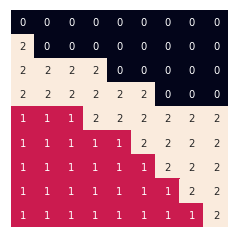

Episode 4340	Average Score: -18.47
0.01


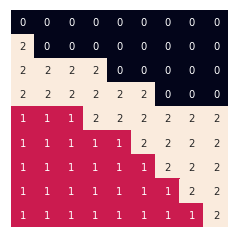

Episode 4360	Average Score: -17.84
0.01


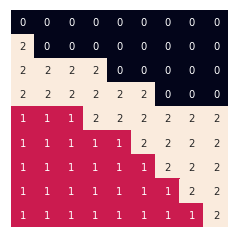

Episode 4380	Average Score: -17.60
0.01


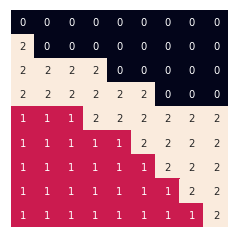

Episode 4400	Average Score: -18.40
0.01


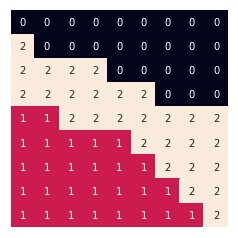

Episode 4420	Average Score: -19.00
0.01


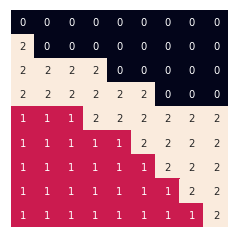

Episode 4440	Average Score: -19.61
0.01


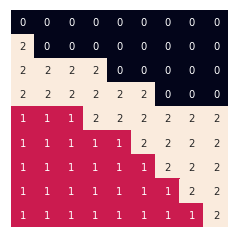

Episode 4460	Average Score: -19.07
0.01


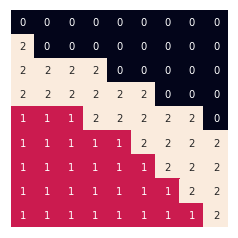

Episode 4480	Average Score: -19.29
0.01


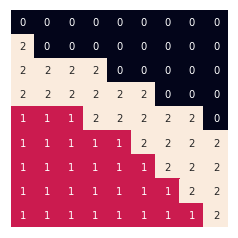

Episode 4500	Average Score: -18.68
0.01


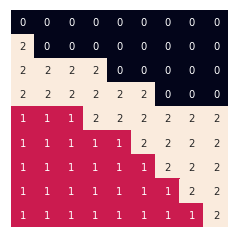

Episode 4520	Average Score: -18.43
0.01


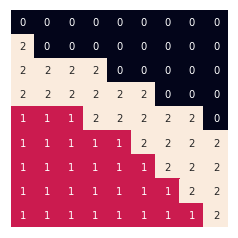

Episode 4540	Average Score: -18.17
0.01


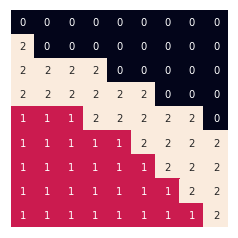

Episode 4560	Average Score: -18.21
0.01


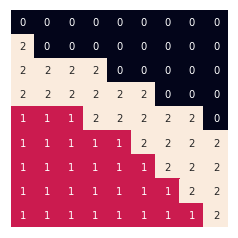

Episode 4580	Average Score: -18.48
0.01


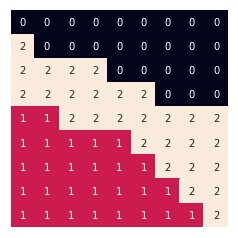

Episode 4600	Average Score: -19.06
0.01


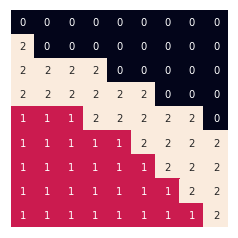

Episode 4620	Average Score: -18.02
0.01


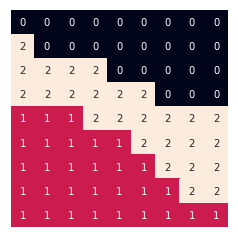

Episode 4640	Average Score: -17.82
0.01


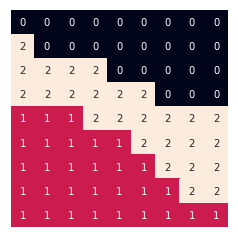

Episode 4660	Average Score: -18.55
0.01


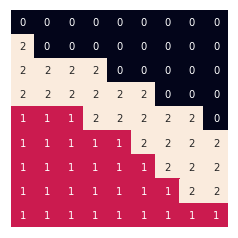

Episode 4680	Average Score: -18.40
0.01


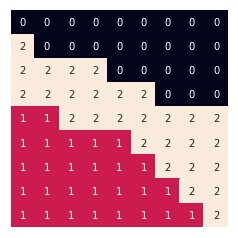

Episode 4700	Average Score: -18.69
0.01


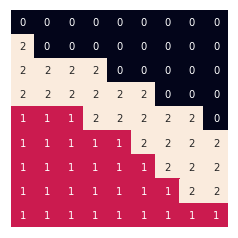

Episode 4720	Average Score: -19.11
0.01


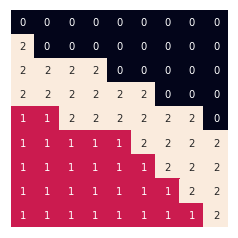

Episode 4740	Average Score: -19.02
0.01


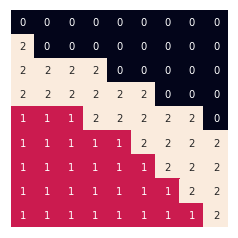

Episode 4760	Average Score: -18.67
0.01


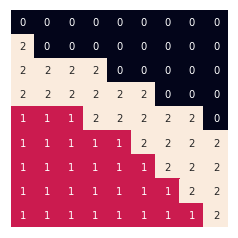

Episode 4780	Average Score: -18.39
0.01


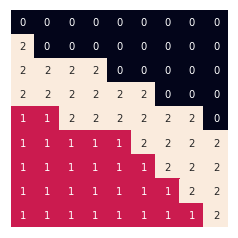

Episode 4800	Average Score: -18.05
0.01


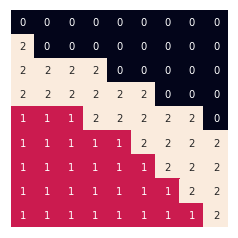

Episode 4820	Average Score: -18.83
0.01


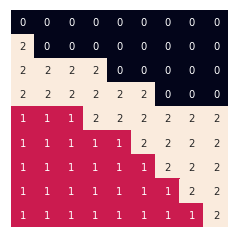

Episode 4840	Average Score: -19.25
0.01


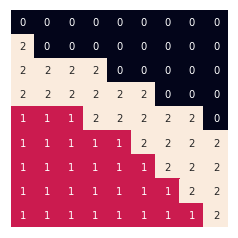

Episode 4860	Average Score: -19.08
0.01


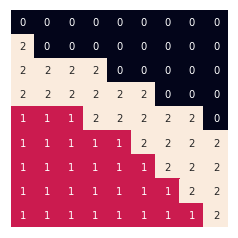

Episode 4880	Average Score: -19.27
0.01


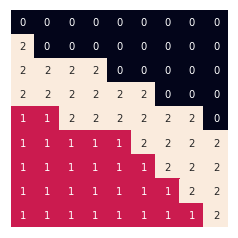

Episode 4900	Average Score: -19.90
0.01


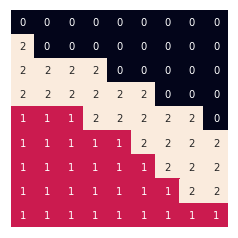

Episode 4920	Average Score: -19.08
0.01


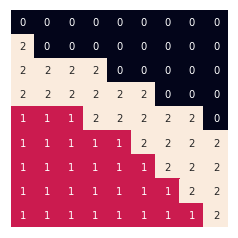

Episode 4940	Average Score: -18.44
0.01


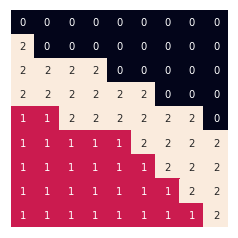

Episode 4960	Average Score: -18.60
0.01


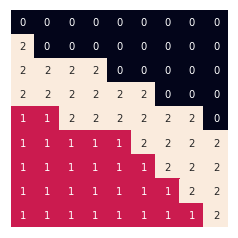

Episode 4980	Average Score: -18.10
0.01


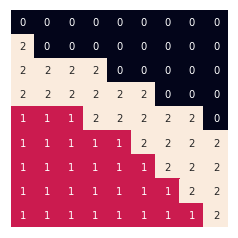

Episode 5000	Average Score: -16.86
0.01


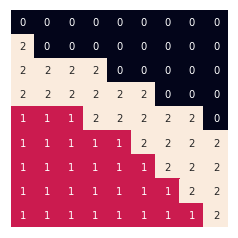

Episode 5020	Average Score: -17.20
0.01


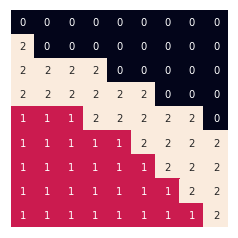

Episode 5040	Average Score: -17.06
0.01


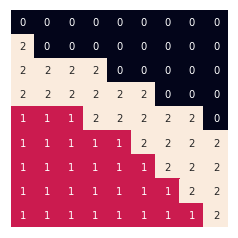

Episode 5060	Average Score: -17.48
0.01


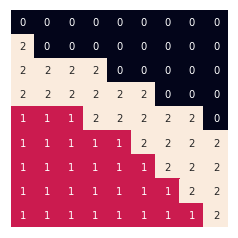

Episode 5080	Average Score: -17.56
0.01


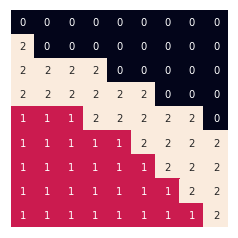

Episode 5100	Average Score: -18.67
0.01


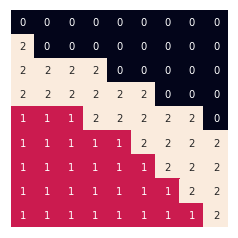

Episode 5120	Average Score: -18.47
0.01


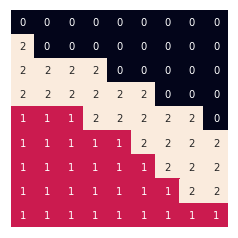

Episode 5140	Average Score: -19.31
0.01


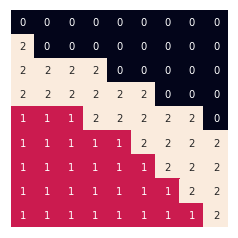

Episode 5160	Average Score: -18.65
0.01


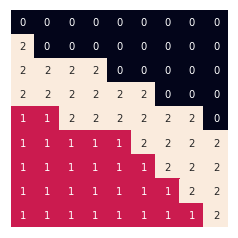

Episode 5180	Average Score: -19.34
0.01


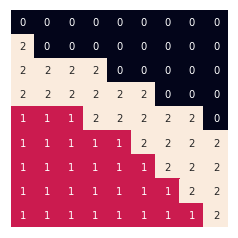

Episode 5200	Average Score: -19.14
0.01


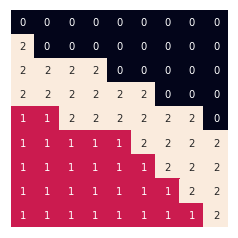

Episode 5220	Average Score: -19.14
0.01


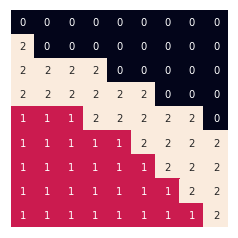

Episode 5240	Average Score: -18.60
0.01


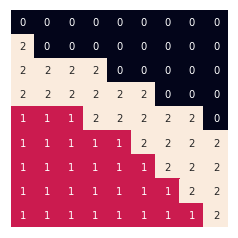

Episode 5260	Average Score: -19.41
0.01


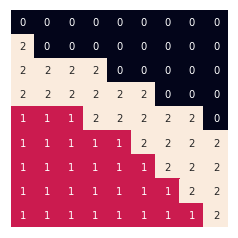

Episode 5280	Average Score: -18.97
0.01


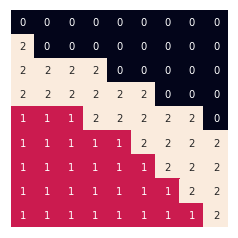

Episode 5300	Average Score: -18.57
0.01


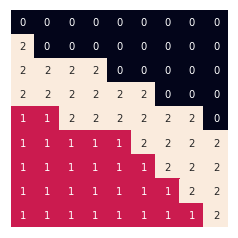

Episode 5320	Average Score: -18.49
0.01


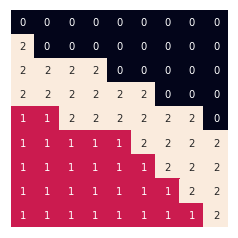

Episode 5340	Average Score: -18.39
0.01


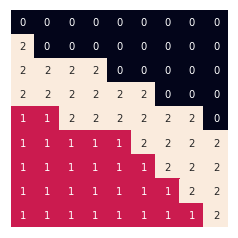

Episode 5360	Average Score: -17.88
0.01


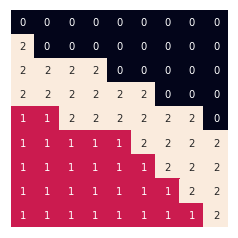

Episode 5380	Average Score: -18.07
0.01


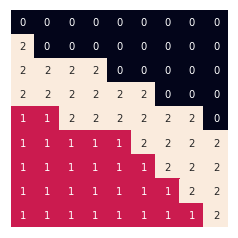

Episode 5400	Average Score: -17.53
0.01


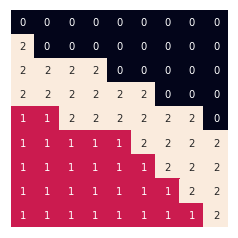

Episode 5420	Average Score: -17.26
0.01


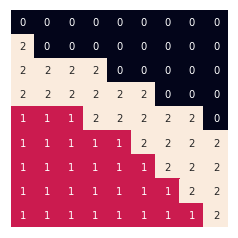

Episode 5440	Average Score: -17.57
0.01


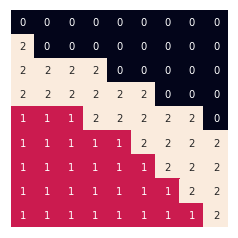

Episode 5460	Average Score: -17.82
0.01


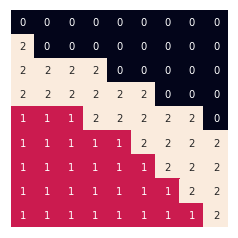

Episode 5480	Average Score: -16.79
0.01


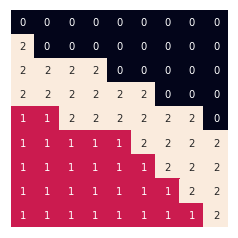

Episode 5500	Average Score: -18.08
0.01


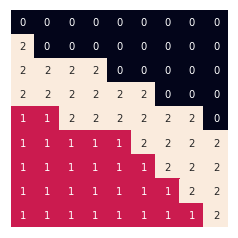

Episode 5520	Average Score: -18.72
0.01


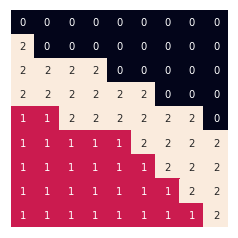

Episode 5540	Average Score: -18.31
0.01


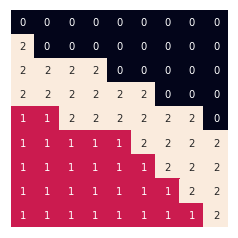

Episode 5560	Average Score: -18.25
0.01


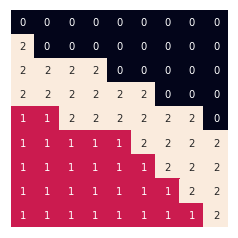

Episode 5580	Average Score: -19.17
0.01


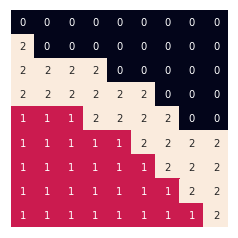

Episode 5600	Average Score: -18.10
0.01


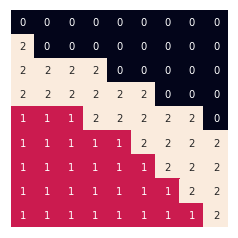

Episode 5620	Average Score: -17.94
0.01


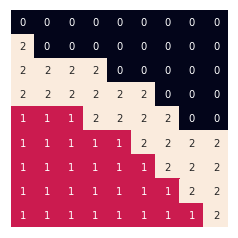

Episode 5640	Average Score: -18.16
0.01


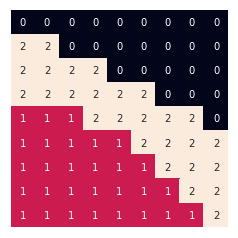

Episode 5660	Average Score: -18.08
0.01


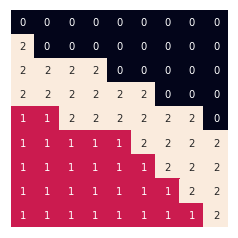

Episode 5680	Average Score: -18.03
0.01


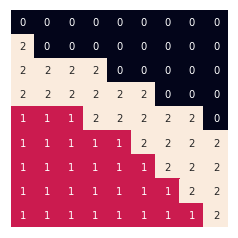

Episode 5700	Average Score: -18.81
0.01


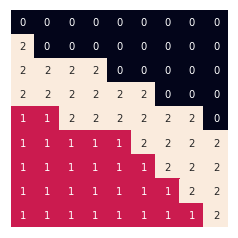

Episode 5720	Average Score: -19.21
0.01


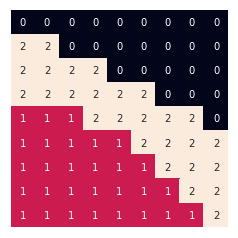

Episode 5740	Average Score: -19.53
0.01


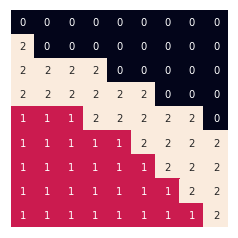

Episode 5760	Average Score: -20.39
0.01


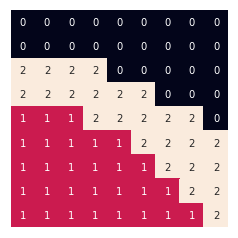

Episode 5780	Average Score: -20.83
0.01


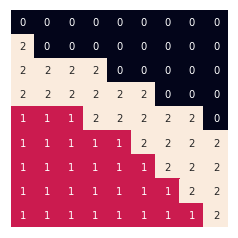

Episode 5800	Average Score: -19.47
0.01


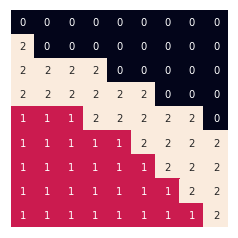

Episode 5820	Average Score: -19.34
0.01


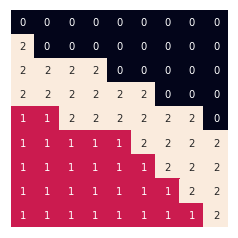

Episode 5840	Average Score: -19.20
0.01


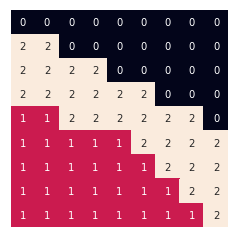

Episode 5860	Average Score: -17.77
0.01


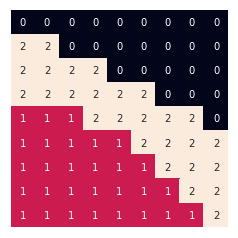

Episode 5880	Average Score: -17.07
0.01


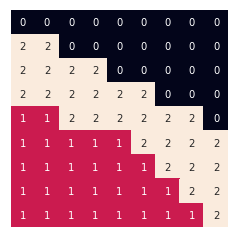

Episode 5900	Average Score: -18.78
0.01


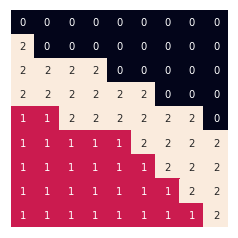

Episode 5920	Average Score: -18.37
0.01


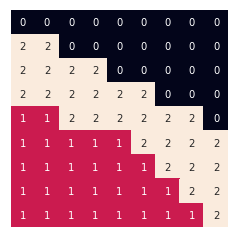

Episode 5940	Average Score: -17.95
0.01


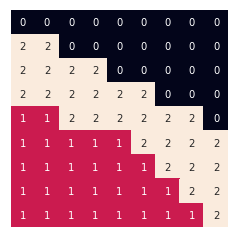

Episode 5960	Average Score: -17.39
0.01


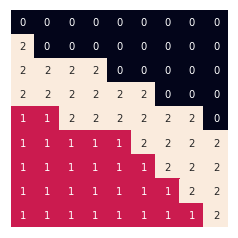

Episode 5980	Average Score: -16.93
0.01


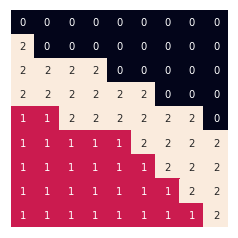

Episode 6000	Average Score: -15.42
0.01


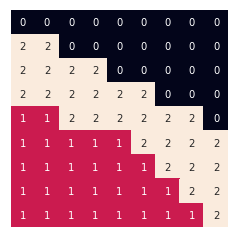

Episode 6020	Average Score: -15.02
0.01


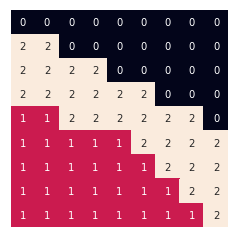

Episode 6040	Average Score: -14.78
0.01


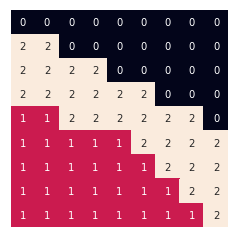

Episode 6060	Average Score: -15.50
0.01


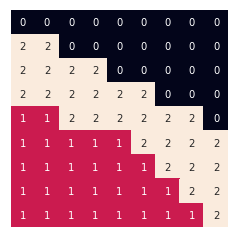

Episode 6080	Average Score: -15.84
0.01


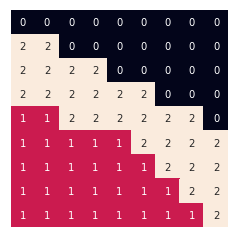

Episode 6100	Average Score: -16.75
0.01


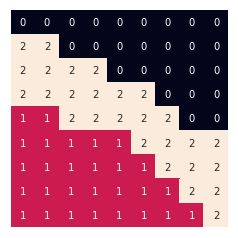

Episode 6120	Average Score: -16.83
0.01


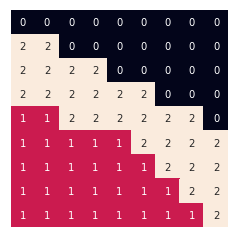

Episode 6140	Average Score: -17.64
0.01


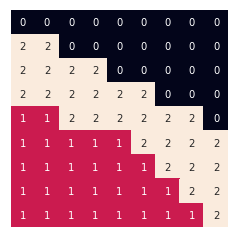

Episode 6160	Average Score: -17.73
0.01


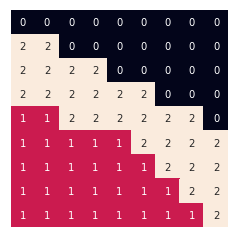

Episode 6180	Average Score: -17.96
0.01


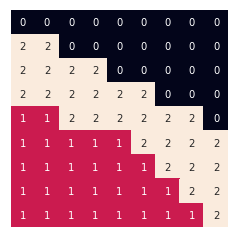

Episode 6200	Average Score: -17.60
0.01


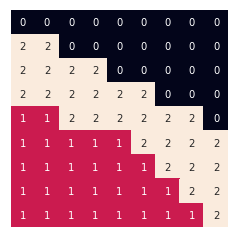

Episode 6220	Average Score: -17.91
0.01


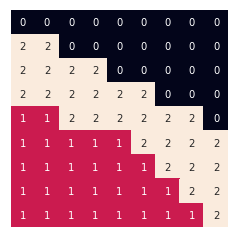

Episode 6240	Average Score: -17.80
0.01


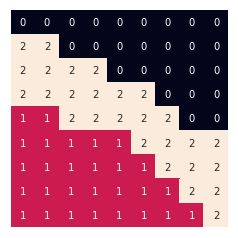

Episode 6260	Average Score: -18.64
0.01


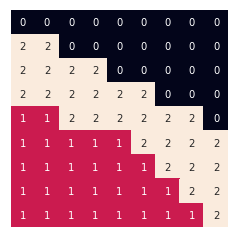

Episode 6280	Average Score: -18.42
0.01


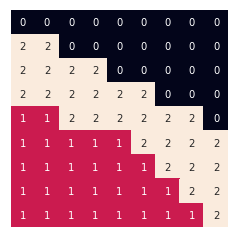

Episode 6300	Average Score: -18.02
0.01


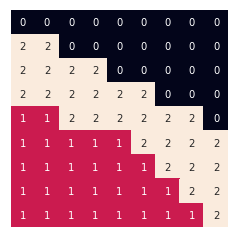

Episode 6320	Average Score: -18.35
0.01


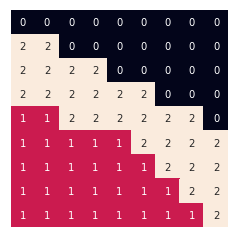

Episode 6340	Average Score: -16.71
0.01


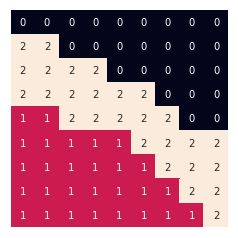

Episode 6360	Average Score: -15.94
0.01


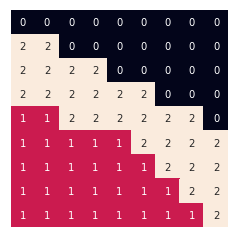

Episode 6380	Average Score: -15.89
0.01


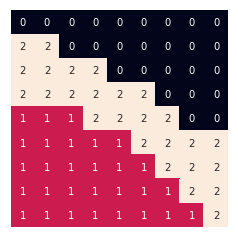

Episode 6400	Average Score: -16.21
0.01


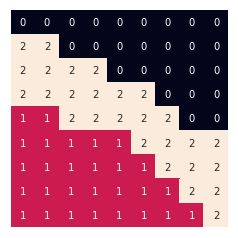

Episode 6420	Average Score: -15.28
0.01


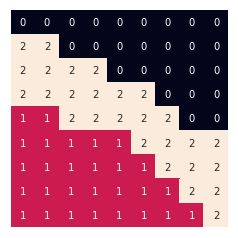

Episode 6440	Average Score: -16.87
0.01


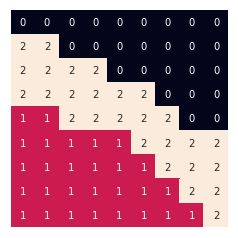

Episode 6460	Average Score: -16.97
0.01


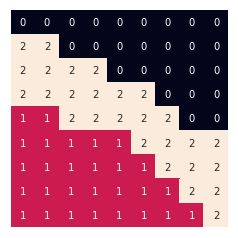

Episode 6480	Average Score: -17.21
0.01


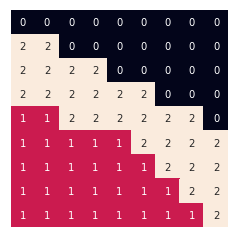

Episode 6500	Average Score: -16.50
0.01


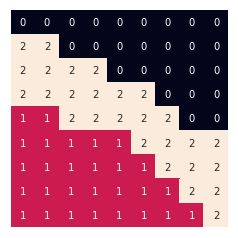

Episode 6520	Average Score: -16.63
0.01


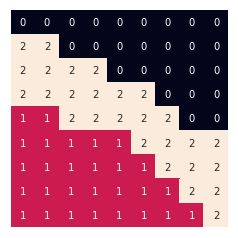

Episode 6540	Average Score: -16.27
0.01


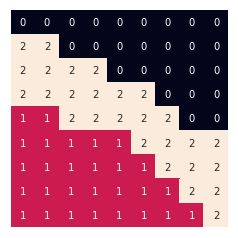

Episode 6560	Average Score: -15.28
0.01


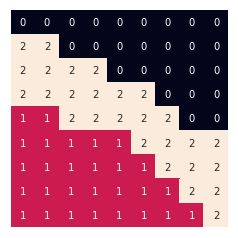

Episode 6580	Average Score: -15.87
0.01


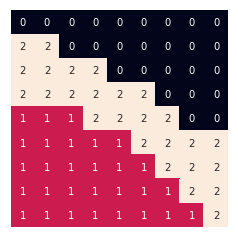

Episode 6600	Average Score: -16.74
0.01


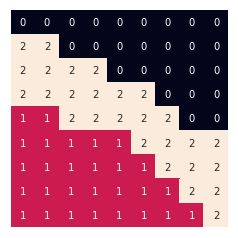

Episode 6620	Average Score: -17.16
0.01


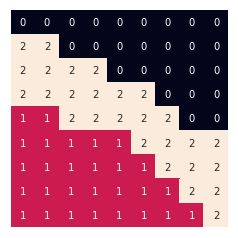

Episode 6640	Average Score: -17.51
0.01


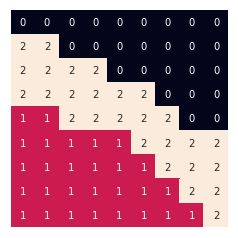

Episode 6660	Average Score: -18.89
0.01


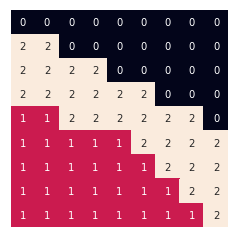

Episode 6680	Average Score: -18.49
0.01


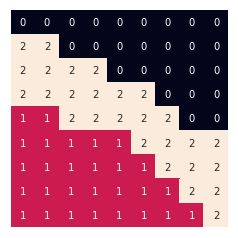

Episode 6700	Average Score: -18.50
0.01


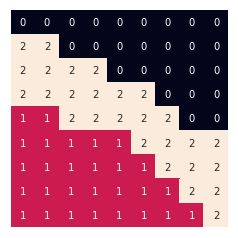

Episode 6720	Average Score: -18.44
0.01


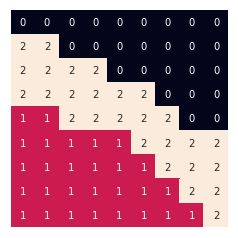

Episode 6740	Average Score: -17.85
0.01


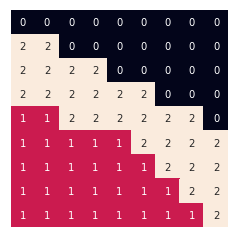

Episode 6760	Average Score: -18.03
0.01


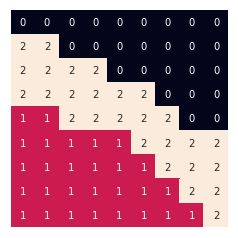

Episode 6780	Average Score: -18.08
0.01


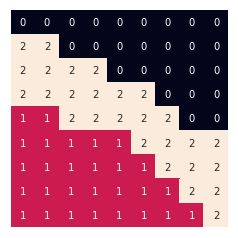

Episode 6800	Average Score: -17.88
0.01


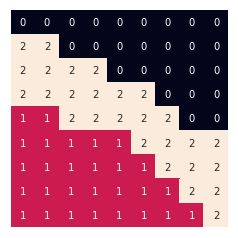

Episode 6820	Average Score: -17.40
0.01


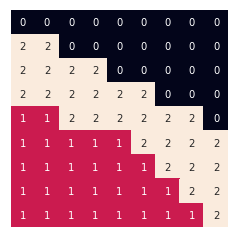

Episode 6840	Average Score: -17.33
0.01


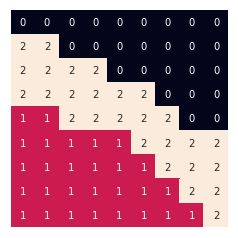

Episode 6860	Average Score: -15.53
0.01


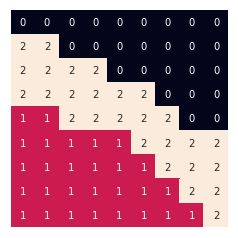

Episode 6880	Average Score: -15.04
0.01


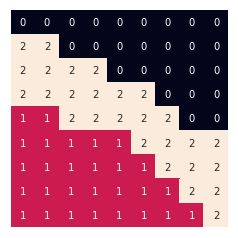

Episode 6900	Average Score: -14.53
0.01


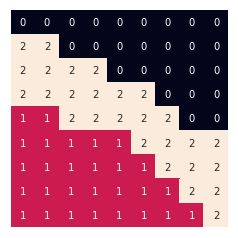

Episode 6920	Average Score: -15.16
0.01


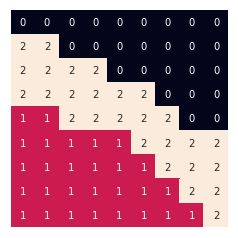

Episode 6940	Average Score: -14.87
0.01


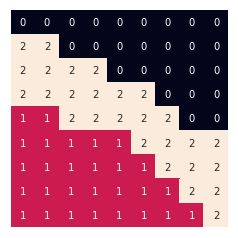

Episode 6960	Average Score: -16.13
0.01


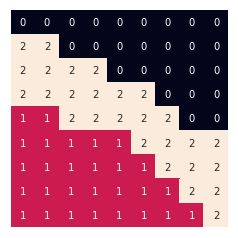

Episode 6980	Average Score: -16.63
0.01


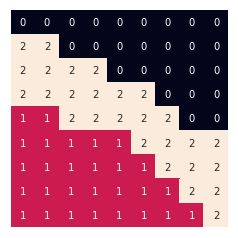

Episode 7000	Average Score: -17.51
0.01


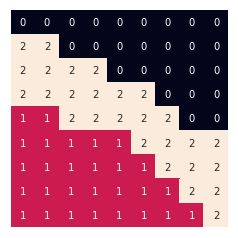

Episode 7020	Average Score: -17.62
0.01


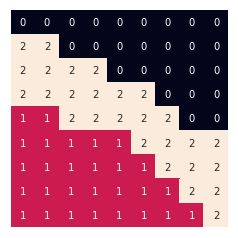

Episode 7040	Average Score: -18.44
0.01


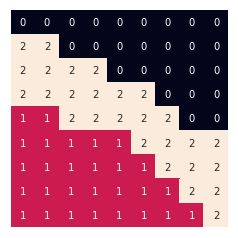

Episode 7060	Average Score: -18.10
0.01


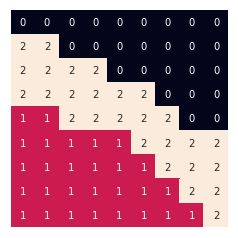

Episode 7080	Average Score: -17.56
0.01


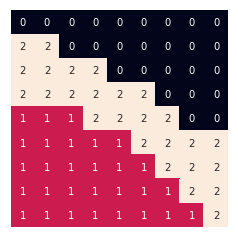

Episode 7100	Average Score: -16.62
0.01


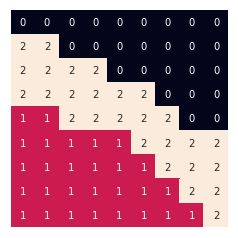

Episode 7120	Average Score: -16.72
0.01


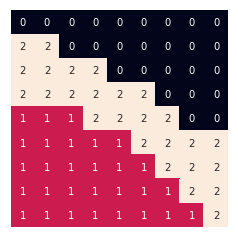

Episode 7140	Average Score: -16.96
0.01


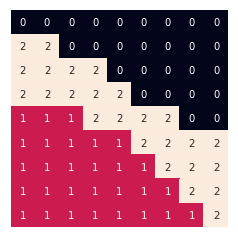

Episode 7160	Average Score: -17.74
0.01


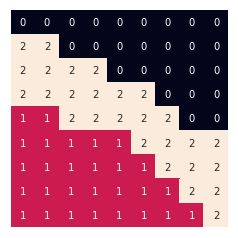

Episode 7180	Average Score: -17.65
0.01


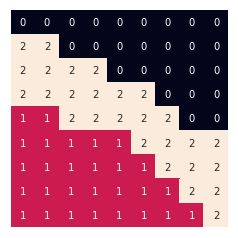

Episode 7200	Average Score: -18.79
0.01


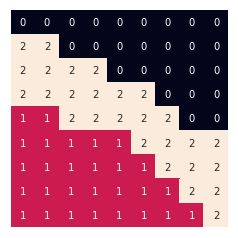

Episode 7220	Average Score: -17.90
0.01


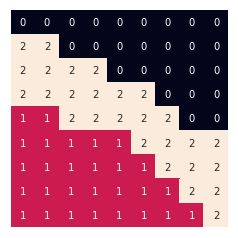

Episode 7240	Average Score: -17.09
0.01


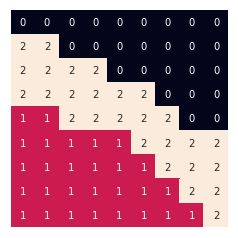

Episode 7260	Average Score: -16.56
0.01


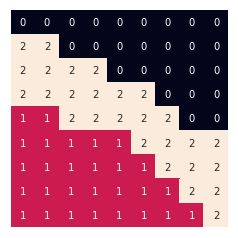

Episode 7280	Average Score: -16.55
0.01


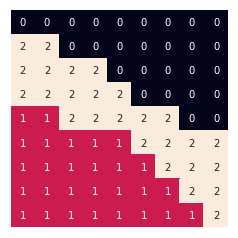

Episode 7300	Average Score: -15.90
0.01


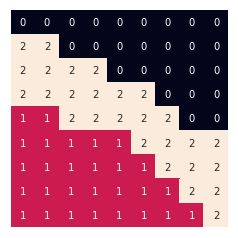

Episode 7320	Average Score: -16.16
0.01


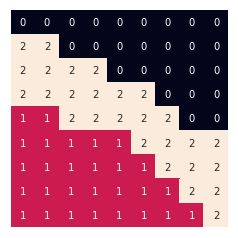

Episode 7340	Average Score: -16.02
0.01


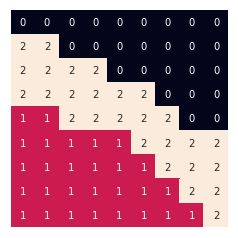

Episode 7360	Average Score: -15.71
0.01


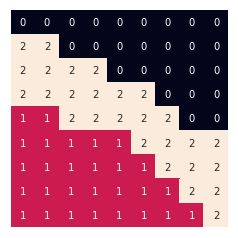

Episode 7380	Average Score: -15.36
0.01


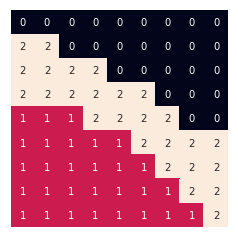

Episode 7400	Average Score: -15.99
0.01


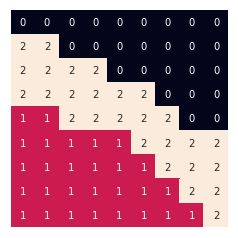

Episode 7420	Average Score: -16.23
0.01


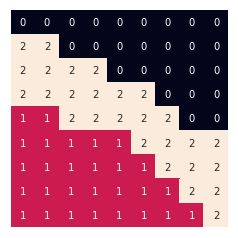

Episode 7440	Average Score: -16.18
0.01


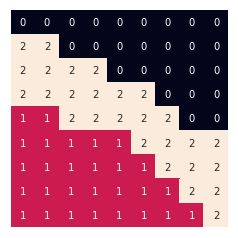

Episode 7460	Average Score: -16.28
0.01


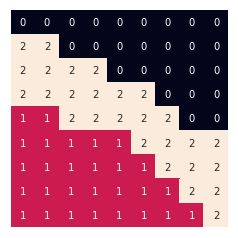

Episode 7480	Average Score: -16.61
0.01


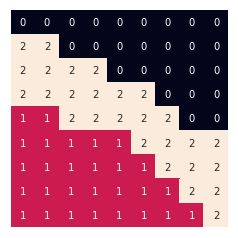

Episode 7500	Average Score: -16.13
0.01


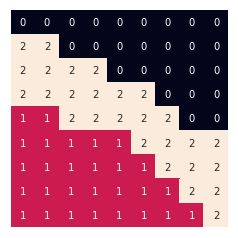

Episode 7520	Average Score: -15.92
0.01


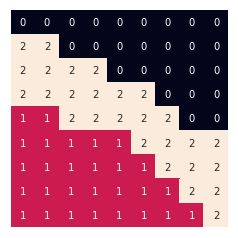

Episode 7540	Average Score: -17.04
0.01


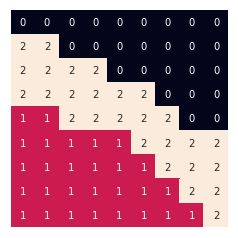

Episode 7560	Average Score: -17.00
0.01


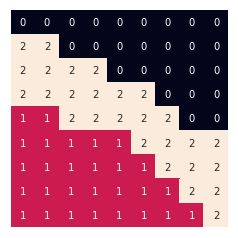

Episode 7580	Average Score: -16.90
0.01


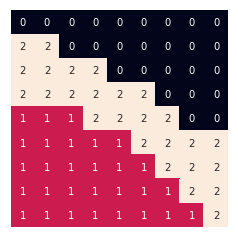

Episode 7600	Average Score: -17.11
0.01


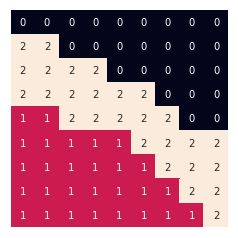

Episode 7620	Average Score: -17.45
0.01


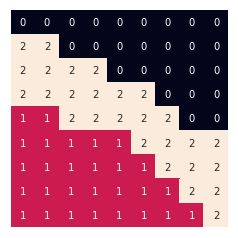

Episode 7640	Average Score: -16.78
0.01


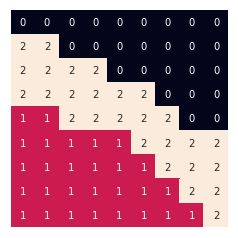

Episode 7660	Average Score: -17.33
0.01


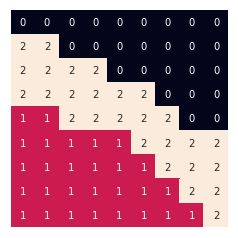

Episode 7680	Average Score: -17.91
0.01


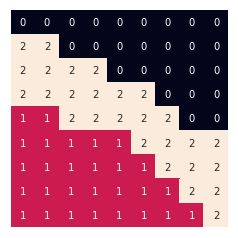

Episode 7700	Average Score: -16.98
0.01


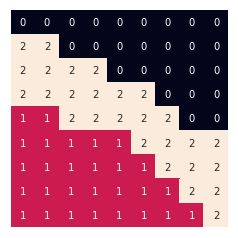

Episode 7720	Average Score: -16.69
0.01


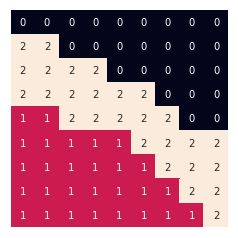

Episode 7740	Average Score: -16.53
0.01


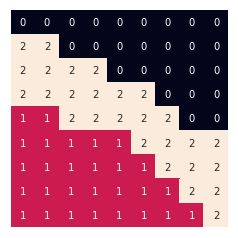

Episode 7760	Average Score: -16.23
0.01


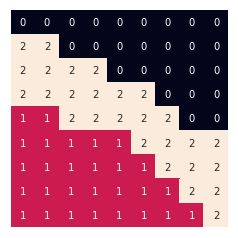

Episode 7780	Average Score: -15.81
0.01


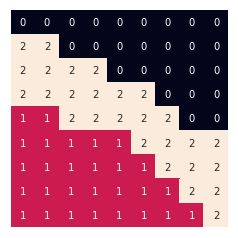

Episode 7800	Average Score: -16.59
0.01


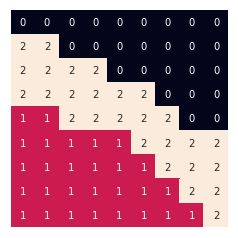

Episode 7820	Average Score: -16.25
0.01


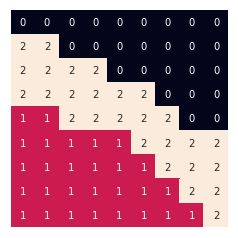

Episode 7840	Average Score: -15.98
0.01


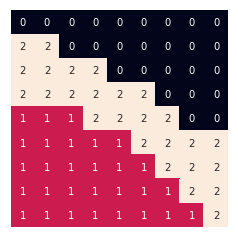

Episode 7860	Average Score: -15.73
0.01


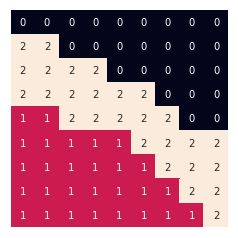

Episode 7880	Average Score: -16.42
0.01


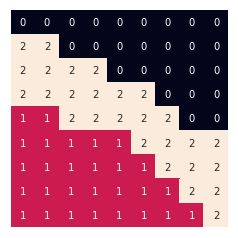

Episode 7900	Average Score: -16.29
0.01


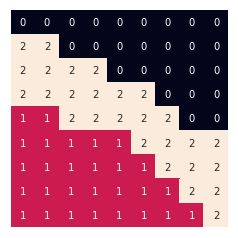

Episode 7920	Average Score: -16.63
0.01


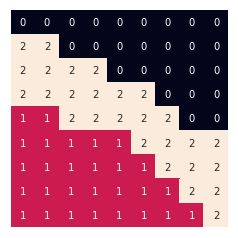

Episode 7940	Average Score: -16.94
0.01


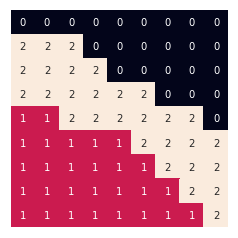

Episode 7960	Average Score: -17.09
0.01


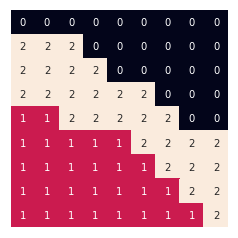

Episode 7980	Average Score: -16.45
0.01


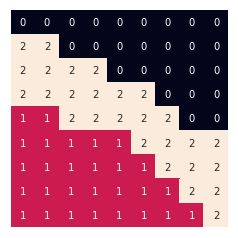

Episode 8000	Average Score: -16.26
0.01


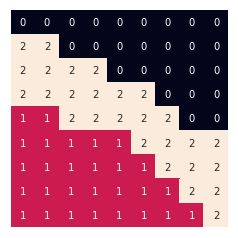

Episode 8020	Average Score: -16.29
0.01


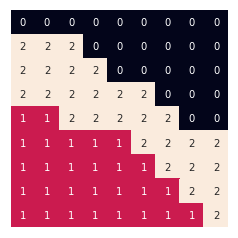

Episode 8040	Average Score: -15.90
0.01


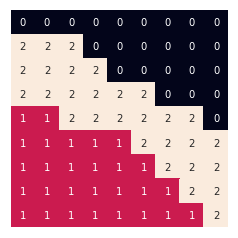

Episode 8060	Average Score: -16.21
0.01


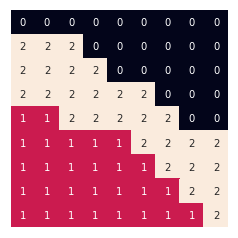

Episode 8080	Average Score: -15.56
0.01


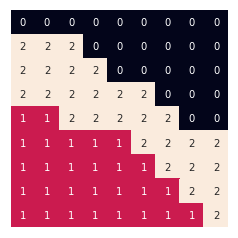

Episode 8100	Average Score: -15.62
0.01


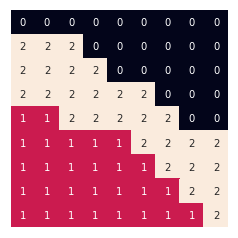

Episode 8120	Average Score: -15.97
0.01


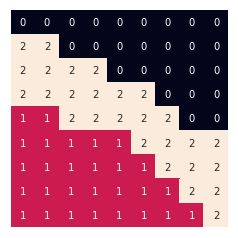

Episode 8140	Average Score: -16.17
0.01


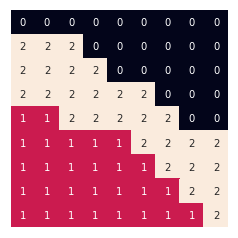

Episode 8160	Average Score: -15.72
0.01


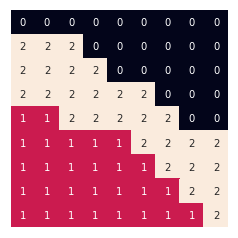

Episode 8180	Average Score: -15.83
0.01


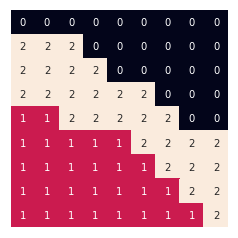

Episode 8200	Average Score: -15.70
0.01


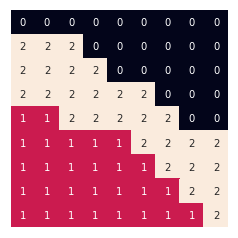

Episode 8220	Average Score: -15.42
0.01


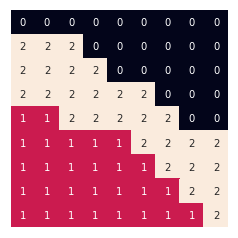

Episode 8240	Average Score: -15.76
0.01


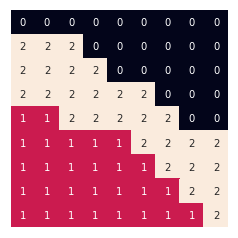

Episode 8254	Average Score: -16.26

KeyboardInterrupt: 

In [5]:
def dqn(n_episodes=20000, max_t=100, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(np.asarray(state), eps)
            next_state, reward = env.takeAction(action)
            reward_val = evalReward(reward)
            agent.step(state, action, reward_val, next_state)
            state = next_state
            score += reward_val
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps*eps_decay) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 20 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            print(eps)
            policy = agent.extractPolicy()
            plt.imshow(policy)
            ax = sns.heatmap(policy, annot=True)
            cb = ax.collections[-1].colorbar   
            cb.remove()
            plt.xticks([])
            plt.yticks([])
            plt.show()
    return scores

scores = dqn()

In [16]:
state = torch.from_numpy(np.asarray([1, 0])).float().unsqueeze(0).to("cpu")
agent.qnetwork_local.eval()
with torch.no_grad():
    action_values = agent.qnetwork_local(state)

In [17]:
action_values

tensor([[-4.7143, -4.0644, -4.2952]])

In [ ]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')`
plt.xlabel('Episode #')
plt.show()